In [9]:
from sklearn import metrics    
import time
from sklearn.model_selection import train_test_split
import numpy as np 
from PIL import Image
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier
from sklearn.ensemble      import ExtraTreesClassifier
from sklearn.ensemble      import AdaBoostClassifier
from sklearn.ensemble      import GradientBoostingClassifier
from sklearn.experimental  import enable_hist_gradient_boosting 
# Necesary for HistGradientBoostingClassifier
from sklearn.ensemble      import HistGradientBoostingClassifier
from xgboost               import XGBClassifier
from lightgbm              import LGBMClassifier
from catboost              import CatBoostClassifier



In [10]:
#Changed the name of folders as follows

#Rock= 0
#Paper=1
#Scissor=2


In [11]:
path = 'images'
data1 = pd.DataFrame ()
data2= pd.DataFrame()
for folder in os.listdir(path):
    if folder == 'train':
    
        for f in os.listdir (path + '/' + folder):
            class_data = np.zeros ( (len(os.listdir (path + '/' + folder + '/' + f )), 1025) )
            print(f'Original shape for folder {f} in {folder}')
            print (class_data.shape)
        
            for i, img_name in enumerate (os.listdir (path + '/' + folder + '/' + f )):

                img = Image.open (path + '/' + folder + '/' + f + '/' + img_name)
                img_arr = np.array (img, dtype = int)
                img_arr = img_arr.flatten()
                
                class_data [i, :1024] = img_arr
                class_data [i, 1024]  = int (f)  #assigning target to the last column 

            class_data = pd.DataFrame (class_data)
            data1 = pd.concat ([data1, class_data])
            print(f'Size after concatination for folder {f} in {folder}')
            print(data1.shape)
    else:
        for f in os.listdir (path + '/' + folder):
            class_data = np.zeros ( (len(os.listdir (path + '/' + folder + '/' + f )), 1025) )
            print(f'Original shape for folder {f} in {folder}')
            print (class_data.shape)
        
            for i, img_name in enumerate (os.listdir (path + '/' + folder + '/' + f )):

                img = Image.open (path + '/' + folder + '/' + f + '/' + img_name)
                img_arr = np.array (img, dtype = int)
                img_arr = img_arr.flatten()
                
                class_data [i, :1024] = img_arr
                class_data [i, 1024]  = int (f)  #assigning target to the last column 

            class_data = pd.DataFrame (class_data)
            data2 = pd.concat ([data2, class_data])
            print(f'Size after concatenation for folder {f} in {folder}')
            print(data2.shape)

            
data1.to_csv ('train_game.csv')
data2.to_csv('test_game.csv')



Original shape for folder 0 in train
(189, 1025)
Size after concatination for folder 0 in train
(189, 1025)
Original shape for folder 1 in train
(177, 1025)
Size after concatination for folder 1 in train
(366, 1025)
Original shape for folder 2 in train
(193, 1025)
Size after concatination for folder 2 in train
(559, 1025)
Original shape for folder 0 in validation1
(98, 1025)
Size after concatenation for folder 0 in validation1
(98, 1025)
Original shape for folder 1 in validation1
(62, 1025)
Size after concatenation for folder 1 in validation1
(160, 1025)
Original shape for folder 2 in validation1
(85, 1025)
Size after concatenation for folder 2 in validation1
(245, 1025)


In [12]:
X_tr = data1.iloc[:,:1024]
y_tr = data1.iloc[:,1024]

X_val = data2.iloc[:,:1024]
y_val = data2.iloc[:,1024]

In [13]:
X_val


,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


data_norm_train = scaler.fit_transform(X_tr)
data_norm_test = scaler.transform(X_val)

In [15]:
data_norm_train[0,-1]

0.0

In [16]:
!pip install catboost==0.26.1

In [17]:
from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier
from sklearn.ensemble      import ExtraTreesClassifier
from sklearn.ensemble      import AdaBoostClassifier
from sklearn.ensemble      import GradientBoostingClassifier
from sklearn.experimental  import enable_hist_gradient_boosting 
# Necesary for HistGradientBoostingClassifier
from sklearn.ensemble      import HistGradientBoostingClassifier
from xgboost               import XGBClassifier
from lightgbm              import LGBMClassifier
from catboost              import CatBoostClassifier

In [18]:
tree_classifiers = {
  "Decision Tree": DecisionTreeClassifier(),
  "Extra Trees":   ExtraTreesClassifier(),
  "Random Forest": RandomForestClassifier(),
  "AdaBoost":      AdaBoostClassifier(),
  "Skl GBM":       GradientBoostingClassifier(),
  "Skl HistGBM":   GradientBoostingClassifier(),
  "XGBoost":       XGBClassifier(),
  "LightGBM":      LGBMClassifier(),
  "CatBoost":      CatBoostClassifier() 
}

In [19]:

x_train, x_test, y_train, y_test = train_test_split(X_tr, y_tr, test_size=0.2, random_state=42)




results = pd.DataFrame({'Model': [], 'Accuracy': [], 'Bal Acc.': [], 'Time': []})


for model_name, model in tree_classifiers.items(): # FOR EVERY PIPELINE (PREPRO + MODEL) -> TRAIN WITH TRAIN DATA (x_train)
    start_time = time.time()
    model.fit(x_train, y_train)
    pred = model.predict(X_val)    # GET PREDICTIONS USING x_val
    total_time = time.time() - start_time

    results = results.append({"Model":    model_name,
                              "Accuracy": metrics.accuracy_score(y_val, pred)*100,
                              "Bal Acc.": metrics.balanced_accuracy_score(y_val, pred)*100,
                              "Time":     total_time},
                              ignore_index=True)
                              
                              

 
# Your code goes here


results_ord = results.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)
results_ord.index += 1 
results_ord.style.bar(subset=['Accuracy', 'Bal Acc.'], vmin=0, vmax=100, color='#5fba7d')

C:\Users\ASUS\anaconda3\envs\myenv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:32:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.075943
0:	learn: 1.0235398	total: 243ms	remaining: 4m 2s
1:	learn: 0.9486590	total: 307ms	remaining: 2m 33s
2:	learn: 0.8754414	total: 365ms	remaining: 2m 1s
3:	learn: 0.8197191	total: 430ms	remaining: 1m 46s
4:	learn: 0.7742176	total: 472ms	remaining: 1m 34s
5:	learn: 0.7307581	total: 524ms	remaining: 1m 26s
6:	learn: 0.6873116	total: 586ms	remaining: 1m 23s
7:	learn: 0.6482990	total: 629ms	remaining: 1m 17s
8:	learn: 0.6087203	total: 679ms	remaining: 1m 14s
9:	learn: 0.5753984	total: 730ms	remaining: 1m 12s
10:	learn: 0.5462879	total: 795ms	remaining: 1m 11s
11:	learn: 0.5194288	total: 887ms	remaining: 1m 13s
12:	learn: 0.4963999	total: 962ms	remaining: 1m 13s
13:	learn: 0.4730157	total: 1.05s	remaining: 1m 14s
1

,Model,Accuracy,Bal Acc.,Time
1,Extra Trees,86.122449,86.459487,0.152052
2,LightGBM,85.306122,85.675173,0.334079
3,CatBoost,82.857143,83.790419,72.410856
4,Random Forest,82.448980,82.649705,0.151670
5,XGBoost,80.816327,80.696666,0.372333
6,Skl GBM,80.408163,81.292001,2.112070
7,Skl HistGBM,78.775510,79.827415,2.127052
8,AdaBoost,76.326531,76.352089,0.336029
9,Decision Tree,69.795918,68.217222,0.026007


In [20]:
#!pip install opencv-python
#import cv2
#image = cv2.imread("WIN_20210811_13_32_08_Pro.jpg")

RANDOM FOREST IS THE FREAKING KING!

In [21]:
!pip install mediapipe


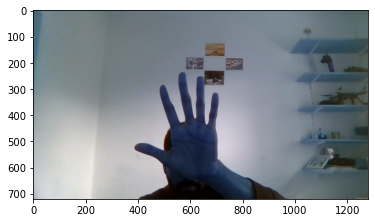

In [3]:
import cv2
import matplotlib.pyplot as plt

rawimage = cv2.imread('extra/paper.jpg')

plt.imshow(rawimage, cmap= 'gray')


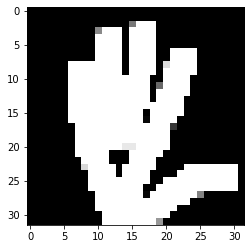

In [4]:
#Transform the Image into 32 x 32 skeleton using transform_image.py
from handgestures.transform_image import transform_single_image

skel_img = transform_single_image(rawimage)

plt.imshow(skel_img, cmap="gray")
#else:
#    print('Please try with another image!')

    





In [5]:
#Processing the Skeleton input into a transposed dataframe for classifying purpose
img_arr = np.array(img, dtype = int)
img_arr = img_arr.flatten()
class_data_trail= pd.DataFrame(img_arr)
class_data_trail=class_data_trail.transpose()

# Build the MACHINE LEARNING MODEL using the chosen method
chosen_model = ExtraTreesClassifier()
chosen_model.fit(x_train,y_train)

NameError: name 'np' is not defined

In [105]:
#Use the Chosen MACHINE LEARNING MODEL to classify the input
rps_input_predict = model.predict(class_data_trail)

print(rps_input_predict[0])

if int(rps_input_predict[0]) == 0:
    print("You choose PAPER!")
elif int(rps_input_predict[0]) == 1:
    print("You choose ROCK!")
else:
    print("You choose SCISSORS")

1.0
You choose ROCK!


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=94e431f8-42fe-427d-ad9d-8b943b5f884e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>